# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [100]:
#Write your code here, You may need to use python open() function to open the file and load data.
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('yearinfo.json') as f:
   yearinfo = json.load(f)

print(yearinfo)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [101]:
#To print the keys inside the json file
yearinfo.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [102]:
# To check the number of songs per year let say 2011
len(yearinfo['2011'])

100

In [103]:
#print column names inside each year
yearinfo['2011'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [104]:
#To check out the format of each values
yearinfo['2011'][0].values()

dict_values([['Adele'], ['/wiki/Rolling_in_the_Deep'], ['Rolling in the Deep'], 1, '"Rolling in the Deep"', ['/wiki/Adele']])

In [105]:
#creating column for dataframe
column = list(yearinfo['2011'][0].keys())+(['year'])
column

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [106]:
#updating all the data in the song_data_list
song_data_list = []
for key, value in yearinfo.items():
    for i in value:
        data = list(i.values())+[key]
        song_data_list.append(data)
print(song_data_list)

[[['Kesha'], ['/wiki/Tik_Tok_(song)'], ['Tik Tok (song)'], 1, '"Tik Tok"', ['/wiki/Kesha'], '2010'], [['Lady Antebellum'], ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], ['Need You Now (Lady Antebellum song)'], 2, '"Need You Now"', ['/wiki/Lady_Antebellum'], '2010'], [['Train (band)'], ['/wiki/Hey,_Soul_Sister'], ['Hey, Soul Sister'], 3, '"Hey, Soul Sister"', ['/wiki/Train_(band)'], '2010'], [['Katy Perry', 'Snoop Dogg'], ['/wiki/California_Gurls'], ['California Gurls'], 4, '"California Gurls"', ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg'], '2010'], [['Usher (musician)', 'Will.i.am'], ['/wiki/OMG_(Usher_song)'], ['OMG (Usher song)'], 5, '"OMG"', ['/wiki/Usher_(musician)', '/wiki/Will.i.am'], '2010'], [['B.o.B', 'Hayley Williams'], ['/wiki/Airplanes_(song)'], ['Airplanes (song)'], 6, '"Airplanes"', ['/wiki/B.o.B', '/wiki/Hayley_Williams'], '2010'], [['Eminem', 'Rihanna'], ['/wiki/Love_the_Way_You_Lie'], ['Love the Way You Lie'], 7, '"Love the Way You Lie"', ['/wiki/Eminem', '/wiki/Rihanna']

In [107]:
#cnstructing a DataFrame from yearinfo
df = pd.DataFrame(song_data_list,columns=column)

In [108]:
#printing the first 5 data 
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [109]:
#printing last 5 with parameter
df.tail()

band_singer  \
1195                     [Lainey Wilson]   
1196                          [BRS Kash]   
1197                          [Rod Wave]   
1198  [Chase Rice, Florida Georgia Line]   
1199                    [Rauw Alejandro]   

                                               song  \
1195               [/wiki/Things_a_Man_Oughta_Know]   
1196                  [/wiki/Throat_Baby_(Go_Baby)]   
1197                       [/wiki/Tombstone_(song)]   
1198  [/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.]   
1199                             [/wiki/Todo_de_Ti]   

                                  songurl  ranking  \
1195           [Things a Man Oughta Know]       96   
1196              [Throat Baby (Go Baby)]       97   
1197                   [Tombstone (song)]       98   
1198  [Drinkin' Beer. Talkin' God. Amen.]       99   
1199                         [Todo de Ti]      100   

                                titletext  \
1195           "Things a Man Oughta Know"   
1196              "Throat Baby (Go Baby)"   
1197                          "Tombstone"   
1198  "Drinkin' Beer. Talkin' God. Amen."   
1199                         "Todo de Ti"   

                                                 url  year  
1195                           [/wiki/Lainey_Wilson]  2021  
1196                                [/wiki/BRS_Kash]  2021  
1197                                [/wiki/Rod_Wave]  2021  
1198  [/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]  2021  
1199                          [/wiki/Rauw_Alejandro]  2021

In [110]:
# Fetching the first band_singer from the dataframe
df.band_singer[0][0]

'Kesha'

In [111]:
# Checking the datatypes 
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [112]:
#To change the year from object dtype to int
df = df.astype({'year': 'int64'})
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [113]:
#function to enter the data in the formated value in the dataset
def fetch_list_value(list_name):
    value = list_name[0]
    return value

#store the value in the proper format
df['band_singer'] = df.band_singer.map(fetch_list_value)
df['song'] = df.song.map(fetch_list_value)
df['songurl'] = df.songurl.map(fetch_list_value)
df['url'] = df.url.map(fetch_list_value)

In [114]:
#printing first 5 data
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [115]:
#Write your program and plot bar graph
#series selection for plotting graph
# To return the series containing unique rows in dataframe in an ascending order 
new_df = df.value_counts(subset=['band_singer'], ascending=False)
new_df


band_singer      
Drake (musician)     26
Maroon 5             21
Rihanna              21
Ariana Grande        20
Taylor Swift         19
                     ..
Duncan Laurence       1
Dr. Dre               1
Donald Glover         1
Mike Will Made It     1
Kris Allen            1
Length: 436, dtype: int64

In [116]:
new_df = new_df.loc[lambda x : x > 15]
new_df

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

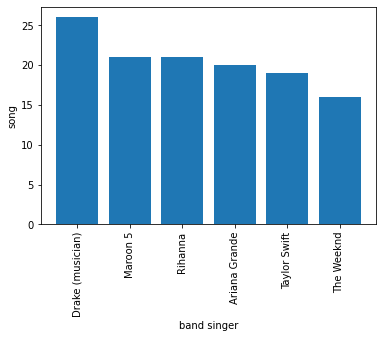

In [117]:
# Plot the graph of singers which appeared more than 15 times. 
y = df.band_singer.value_counts().loc[lambda x : x > 15]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band singer')
plt.ylabel('song')
plt.show()

**Question: Who is the most profilic singer?**

Answer: From the above graph, we come to the conclusion that Drake is the most profilic singer who appeared 26 times.

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [118]:
# write your code here
# assign each song a score 101 - ranking
df['score'] = [101-i for i in df['ranking']]
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [119]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
score           int64
dtype: object

In [120]:
#Adding the total score of the singer along with the singer
singer_score = {}

for singer, songs in df.groupby('band_singer'):
    singer_score[singer] = songs.score.sum()

singer_score

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


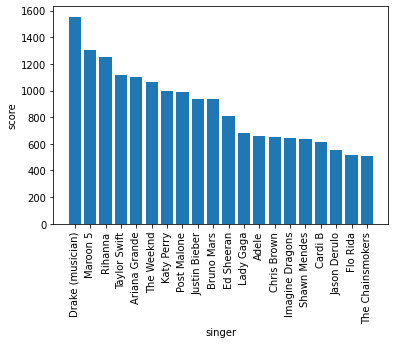

In [121]:
#Ploting a bar graph by taking singer in x-axis and score in y-axis.
y = pd.Series(data=singer_score, index=singer_score.keys()).sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

Answer: When we modify the metric, there is a difference. When it comes to the number of appearances, Taylor Swift is in fourth place, but Ariana Grande is in fourth place when it comes to the scoring. This is because in the first situation, we simply evaluate the number of times the singers appear in the top 100, however in the second case, we consider the ranking as well as the number of times the singers appear in the top 100, and then we award a higher score to those who appear in the higher ranking. It will be more logical to evaluate a higher-quality singer in this manner. If a singer appears higher in the rankings, the singer should be given a greater score. So we're saying that a vocalist who has featured twice at a lower level is of "better quality" than one who has appeared twice at a higher ranking.



## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

In [126]:
# We will try to print the lowest ranked singer in each yearGroup
for key, value in df.groupby('year'):
    lowestrank_df = value[value.ranking == value.ranking.min()]
    print(lowestrank_df.band_singer, lowestrank_df.year)

0    Kesha
Name: band_singer, dtype: object 0    2010
Name: year, dtype: int64
100    Adele
Name: band_singer, dtype: object 100    2011
Name: year, dtype: int64
200    Gotye
Name: band_singer, dtype: object 200    2012
Name: year, dtype: int64
300    Macklemore & Ryan Lewis
Name: band_singer, dtype: object 300    2013
Name: year, dtype: int64
400    Pharrell Williams
Name: band_singer, dtype: object 400    2014
Name: year, dtype: int64
500    Mark Ronson
Name: band_singer, dtype: object 500    2015
Name: year, dtype: int64
600    Justin Bieber
Name: band_singer, dtype: object 600    2016
Name: year, dtype: int64
700    Ed Sheeran
Name: band_singer, dtype: object 700    2017
Name: year, dtype: int64
800    Drake (musician)
Name: band_singer, dtype: object 800    2018
Name: year, dtype: int64
900    Lil Nas X
Name: band_singer, dtype: object 900    2019
Name: year, dtype: int64
1000    The Weeknd
Name: band_singer, dtype: object 1000    2020
Name: year, dtype: int64
1100    Dua Lipa
Nam

## SUBMISSION DATE: 2nd April 2022 